In [50]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [51]:
data = pd.read_csv('stroke.csv', header=0)
print(data.shape)

(5110, 12)


In [52]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [91]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [92]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [93]:
data['gender'].value_counts()

2        2994
1        2115
Other       1
Name: gender, dtype: int64

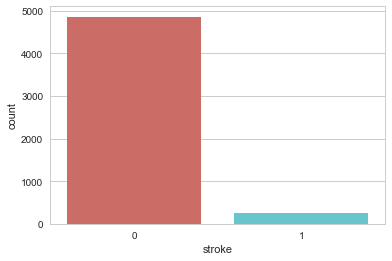

<Figure size 432x288 with 0 Axes>

In [54]:
sns.countplot(x='stroke', data=data , palette='hls')
plt.show()
plt.savefig('count_plot')

In [55]:
no_stroke = len(data[data['stroke']==0])
yes_stroke = len(data[data['stroke']==1])
per_no_stroke = no_stroke/(no_stroke+yes_stroke)
per_yes_stroke = yes_stroke/(no_stroke+yes_stroke)

In [56]:
print("% of no stroke ",per_no_stroke*100)

% of no stroke  95.12720156555773


In [57]:
print("% of stroke ", per_yes_stroke*100)

% of stroke  4.87279843444227


In [98]:
file_handler = open("stroke.csv", "r") 
data = pd.read_csv(file_handler, sep = ",") 
file_handler.close() 
data.gender[data.gender == 'Male'] = 1
data.gender[data.gender == 'Female'] = 2
data.gender[data.gender == 'Other'] = 3
data.smoking_status[data.smoking_status == 'formely smoke'] = 1
data.smoking_status[data.smoking_status == 'never smoked'] = 2
data.smoking_status[data.smoking_status == 'smokes'] = 3
data.smoking_status[data.smoking_status == 'Unknown'] = 4

C:\Users\leesa\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\leesa\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\leesa\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\leesa\AppData\Roaming\Python\Python36\site

In [99]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,2,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,2,1
2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,2,1
3,60182,2,49.0,0,0,Yes,Private,Urban,171.23,34.4,3,1
4,1665,2,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,2,1


In [63]:
data = data.fillna(data.mean())

In [64]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,2,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,2,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,2,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [65]:
data.groupby('stroke').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,,
0,36487.236371,41.971545,0.088871,0.047110,104.795513,28.825388
1,37115.068273,67.728193,0.265060,0.188755,132.544739,30.217789


In [66]:
data.groupby('gender').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,,
1,36562.541371,42.483385,0.104965,0.077069,109.088520,28.659998,0.051064
2,36479.685037,43.757395,0.092184,0.037742,104.057809,29.060168,0.047094
Other,56156.000000,26.000000,0.000000,0.000000,143.330000,22.400000,0.000000


In [67]:
data.groupby('work_type').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
work_type,,,,,,,
Govt_job,36516.936073,50.879756,0.111111,0.054795,107.779772,30.455125,0.050228
Never_worked,38274.409091,16.181818,0.000000,0.000000,96.042727,25.545455,0.000000
Private,36951.227009,45.503932,0.096068,0.054017,106.796844,30.249617,0.050940
Self-employed,35551.288156,60.201465,0.175824,0.098901,112.645446,30.141029,0.079365
children,35769.432314,6.841339,0.000000,0.001456,94.400277,20.244238,0.002911


In [68]:
data.groupby('Residence_type').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
Residence_type,,,,,,,
Rural,36547.998011,42.900811,0.099841,0.053302,106.375235,28.894176,0.045346
Urban,36488.613636,43.542126,0.095146,0.054700,105.927307,28.892328,0.052003


In [69]:
data['Gender']=pd.factorize(data.gender)[0]

In [70]:
data.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Gender
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0
1,51676,2,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,1
2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0
3,60182,2,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1
4,1665,2,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,1
5,56669,1,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1,0
6,53882,1,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1,0
7,10434,2,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1,1
8,27419,2,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1,1
9,60491,2,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1,1


In [71]:
data['Smoking_status']=pd.factorize(data.smoking_status)[0]

In [72]:
data.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Gender,Smoking_status
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0,0
1,51676,2,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,1,1
2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0,1
3,60182,2,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1,2
4,1665,2,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,1,1
5,56669,1,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1,0,0
6,53882,1,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1,0,1
7,10434,2,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1,1,1
8,27419,2,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1,1,3
9,60491,2,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1,1,3


In [73]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Gender,Smoking_status
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0,0
1,51676,2,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,1,1
2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0,1
3,60182,2,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1,2
4,1665,2,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,1,1


In [74]:
data['ever_married']=pd.factorize(data.ever_married)[0]

In [75]:
data['work_type']=pd.factorize(data.work_type)[0]

In [76]:
data['Residence_type']=pd.factorize(data.Residence_type)[0]

In [77]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Gender,Smoking_status
0,9046,1,67.0,0,1,0,0,0,228.69,36.600000,formerly smoked,1,0,0
1,51676,2,61.0,0,0,0,1,1,202.21,28.893237,never smoked,1,1,1
2,31112,1,80.0,0,1,0,0,1,105.92,32.500000,never smoked,1,0,1
3,60182,2,49.0,0,0,0,0,0,171.23,34.400000,smokes,1,1,2
4,1665,2,79.0,1,0,0,1,1,174.12,24.000000,never smoked,1,1,1


In [78]:
data.drop("id",axis=1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Gender,Smoking_status
0,1,67.00,0,1,0,0,0,228.69,36.600000,formerly smoked,1,0,0
1,2,61.00,0,0,0,1,1,202.21,28.893237,never smoked,1,1,1
2,1,80.00,0,1,0,0,1,105.92,32.500000,never smoked,1,0,1
3,2,49.00,0,0,0,0,0,171.23,34.400000,smokes,1,1,2
4,2,79.00,1,0,0,1,1,174.12,24.000000,never smoked,1,1,1
5,1,81.00,0,0,0,0,0,186.21,29.000000,formerly smoked,1,0,0
6,1,74.00,1,1,0,0,1,70.09,27.400000,never smoked,1,0,1
7,2,69.00,0,0,1,0,0,94.39,22.800000,never smoked,1,1,1
8,2,59.00,0,0,0,0,1,76.15,28.893237,Unknown,1,1,3
9,2,78.00,0,0,0,0,0,58.57,24.200000,Unknown,1,1,3


In [79]:
data = data.fillna(data.mean())
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Gender,Smoking_status
0,9046,1,67.0,0,1,0,0,0,228.69,36.600000,formerly smoked,1,0,0
1,51676,2,61.0,0,0,0,1,1,202.21,28.893237,never smoked,1,1,1
2,31112,1,80.0,0,1,0,0,1,105.92,32.500000,never smoked,1,0,1
3,60182,2,49.0,0,0,0,0,0,171.23,34.400000,smokes,1,1,2
4,1665,2,79.0,1,0,0,1,1,174.12,24.000000,never smoked,1,1,1


In [80]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
Gender               0
Smoking_status       0
dtype: int64

In [81]:
X=data.iloc[:,:-1].values

In [82]:
Y=data.iloc[:,-1].values

In [83]:
print(X)
print(Y)

[[9046 1 67.0 ... 'formerly smoked' 1 0]
 [51676 2 61.0 ... 'never smoked' 1 1]
 [31112 1 80.0 ... 'never smoked' 1 0]
 ...
 [19723 2 35.0 ... 'never smoked' 0 1]
 [37544 1 51.0 ... 'formerly smoked' 0 0]
 [44679 2 44.0 ... 'Unknown' 0 1]]
[0 1 1 ... 1 0 3]


In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [87]:
from imblearn.over_sampling import SMOTE

In [88]:

sm= SMOTE(random_state=2)

In [89]:
X_train_res,Y_train_res = sm.fit_sample(X_train,Y_train.ravel())

ValueError: could not convert string to float: 'never smoked'

In [55]:
sc = StandardScaler()

In [56]:
X_train_res = sc.fit_transform(X_train_res)

In [57]:
X_test = sc.transform(X_test)

In [59]:
lr1= LogisticRegression()

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
forest = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=1)

In [64]:
forest.fit(X_train_res,Y_train_res)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [65]:
model = forest

In [67]:
model.score(X_train_res,Y_train_res)

1.0

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
cm = confusion_matrix(Y_test,model.predict(X_test))

In [70]:
print(cm)

[[734   0   0   0   0]
 [  0 196   2   0   0]
 [  0   4 170   0   0]
 [  0   0   0 168   0]
 [  0   0   0   0   4]]
